# Domains

In [1]:
%reload_ext autoreload

%autoreload 2

import math
import os

import iris
import iris.analysis.cartography
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from ml_downscaling_emulator import UKCPDatasetMetadata
from ml_downscaling_emulator.helpers import plot_over_ts
from ml_downscaling_emulator.utils import cp_model_rotated_pole, platecarree, plot_grid
from ml_downscaling_emulator.preprocessing.select_domain import SelectDomain

In [2]:
cpm_grid = xr.open_dataset("../../src/ml_downscaling_emulator/utils/target-grids/2.2km/uk/moose_grid.nc").isel(time=0)
cpm_grid_4x = xr.open_dataset("../../src/ml_downscaling_emulator/utils/target-grids/2.2km-coarsened-4x/uk/moose_grid.nc").isel(time=0)

cpm_grid["pr"] = cpm_grid["pr"]*3600*24
cpm_grid_4x["pr"] = cpm_grid_4x["pr"]*3600*24

## UK

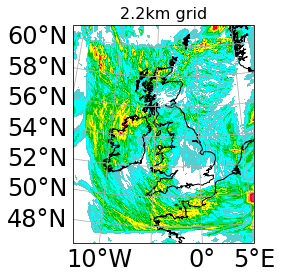

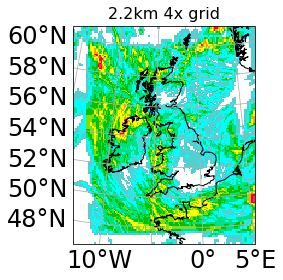

In [3]:
ax = plt.axes(projection=cp_model_rotated_pole)
plot_grid(cpm_grid["pr"], ax, title=f"2.2km grid", style="precip")

plt.show()

ax = plt.axes(projection=cp_model_rotated_pole)
plot_grid(cpm_grid_4x["pr"], ax, title=f"2.2km 4x grid", style="precip")

## London

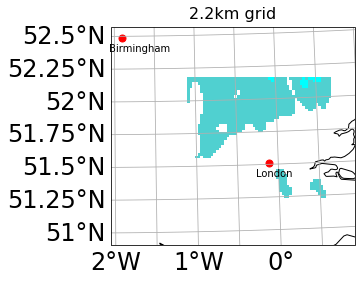

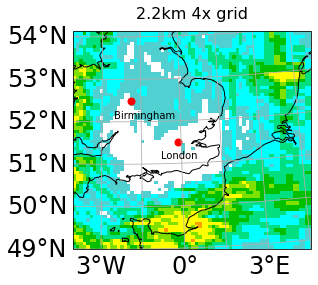

In [4]:
subdomain="london"
ax = plt.axes(projection=cp_model_rotated_pole)
plot_grid(SelectDomain(subdomain).run(cpm_grid)["pr"], ax, title=f"2.2km grid", style="precip")
ax.plot(SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["london"][0], SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["london"][1], 'ro', markersize=7, transform=cp_model_rotated_pole)
ax.text(SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["london"][0]-1e-1, SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["london"][1]-1e-1, "London", transform=cp_model_rotated_pole)
ax.plot(SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["birmingham"][0], SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["birmingham"][1], 'ro', markersize=7, transform=cp_model_rotated_pole)
ax.text(SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["birmingham"][0]-1e-1, SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["birmingham"][1]-1e-1, "Birmingham", transform=cp_model_rotated_pole)

plt.show()

ax = plt.axes(projection=cp_model_rotated_pole)
plot_grid(SelectDomain(subdomain).run(cpm_grid_4x)["pr"], ax, title=f"2.2km 4x grid", style="precip")
ax.plot(SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["london"][0], SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["london"][1], 'ro', markersize=7, transform=cp_model_rotated_pole)
ax.text(SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["london"][0]-4e-1, SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["london"][1]-4e-1, "London", transform=cp_model_rotated_pole)
ax.plot(SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["birmingham"][0], SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["birmingham"][1], 'ro', markersize=7, transform=cp_model_rotated_pole)
ax.text(SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["birmingham"][0]-4e-1, SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["birmingham"][1]-4e-1, "Birmingham", transform=cp_model_rotated_pole)

plt.show()

## Birmingham

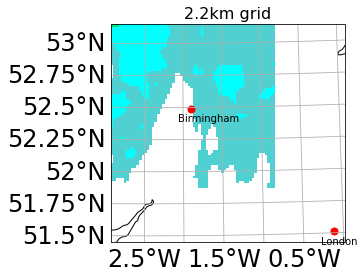

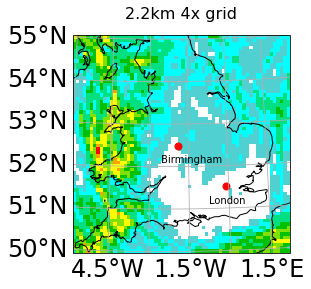

In [5]:
subdomain="birmingham"

ax = plt.axes(projection=cp_model_rotated_pole)
plot_grid(SelectDomain(subdomain).run(cpm_grid)["pr"], ax, title=f"2.2km grid", style="precip")
ax.plot(SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["london"][0], SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["london"][1], 'ro', markersize=7, transform=cp_model_rotated_pole)
ax.text(SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["london"][0]-1e-1, SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["london"][1]-1e-1, "London", transform=cp_model_rotated_pole)
ax.plot(SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["birmingham"][0], SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["birmingham"][1], 'ro', markersize=7, transform=cp_model_rotated_pole)
ax.text(SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["birmingham"][0]-1e-1, SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["birmingham"][1]-1e-1, "Birmingham", transform=cp_model_rotated_pole)

plt.show()

ax = plt.axes(projection=cp_model_rotated_pole)
plot_grid(SelectDomain(subdomain).run(cpm_grid_4x)["pr"], ax, title=f"2.2km 4x grid", style="precip")
ax.plot(SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["london"][0], SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["london"][1], 'ro', markersize=7, transform=cp_model_rotated_pole)
ax.text(SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["london"][0]-4e-1, SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["london"][1]-4e-1, "London", transform=cp_model_rotated_pole)
ax.plot(SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["birmingham"][0], SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["birmingham"][1], 'ro', markersize=7, transform=cp_model_rotated_pole)
ax.text(SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["birmingham"][0]-4e-1, SelectDomain.DOMAIN_CENTRES_RP_LONG_LAT["birmingham"][1]-4e-1, "Birmingham", transform=cp_model_rotated_pole)

plt.show()